<a href="https://colab.research.google.com/github/kumuds4/BCH/blob/master/Making_the_Most_of_your_Colab_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making the Most of your Colab Subscription



# Access Popular LLMs via Google-Colab-AI Without an API Key

Users with Colab's paid plans have free access to most popular LLMs via google-colab-ai Python library. For more details, refer to the [getting started with google colab ai](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb).

In [ ]:
from google.colab import ai
response = ai.generate_text("What is the capital of France?")
print(response)

## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [ ]:
import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

## Longer runtimes

All Colab runtimes are reset after some period of time (which is faster if the runtime isn't executing code). Colab Pro and Pro+ users have access to longer runtimes than those who use Colab free of charge.

## Background execution

Colab Pro+ users have access to background execution, where notebooks will continue executing even after you've closed a browser tab. This is always enabled in Pro+ runtimes as long as you have compute units available.



## Relaxing resource limits in Colab Pro

Your resources are not unlimited in Colab. To make the most of Colab, avoid using resources when you don't need them. For example, only use a GPU when required and close Colab tabs when finished.



If you encounter limitations, you can relax those limitations by purchasing more compute units via Pay As You Go. Anyone can purchase compute units via [Pay As You Go](https://colab.research.google.com/signup); no subscription is required.

## Send us feedback!

If you have any feedback for us, please let us know. The best way to send feedback is by using the Help > 'Send feedback...' menu. If you encounter usage limits in Colab Pro consider subscribing to Pro+.

If you encounter errors or other issues with billing (payments) for Colab Pro, Pro+, or Pay As You Go, please email [colab-billing@google.com](mailto:colab-billing@google.com).

## More Resources

### Working with Notebooks in Colab
- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colab makes possible, check out these tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
dataset = tfds.load('imdb_reviews', as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

batch_size = 32

train_dataset = train_dataset.shuffle(10000).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)
example, label = next(iter(train_dataset))
print('Text:\n', example.numpy()[0])
print('\nLabel: ', label.numpy()[0])
vectorize_layer = tf.keras.layers.TextVectorization(output_mode='int', output_sequence_length=100)

vectorize_layer.adapt(train_dataset.map(lambda x, y: x))
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(len(vectorize_layer.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.build(input_shape=(None,))


model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Text:
 b'If you can make it thru "classic Meyer" titles/intro, you can wade thru anything. But would you want to? I did not find a lot there to dig my teeth into. I suppose if you go into it with low enuff expectations you will be delighted (a la Charlie\'s Angels.) But for my money I\'d like a little something more, more visual, more moving. More. I feel like I\'m begging for gruel @ the foot of the master . the mans got the goods . but he just won\'t share.'

Label:  0


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 64)        │     7,801,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,912,705 (30.18 MB)

 Trainable params: 7,912,705 (30.18 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Colab-ready script: Polar codes (N=64,K=32,CRC-8) with SC, CA-SCL(L=4) and BI-LSTM decoder
# Paste into a single Colab cell and run.

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import math
import csv
import time

# ----------------- Config -----------------
N = 64
K = 32
CRC_LEN = 8
RATE = K / N

# SNR sweep for evaluation (you can adjust)
SNR_RANGE_DB = np.arange(0, 6.0, 0.5)

# Simulation/training sizes (adjust for speed)
NUM_FRAMES = 2000       # frames per SNR for evaluation (increase for final)
EPOCHS = 10             # set to 10 now (you wanted >=10)
BATCH_SIZE = 64

# BI-LSTM params
HIDDEN_SIZE = 64
NUM_LAYERS = 2
LEARNING_RATE = 1e-3

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)

# ----------------- CRC-8 -----------------
CRC_POLY = 0x07

def crc8_encode(bits):
    """bits: 1D np array length = info_len"""
    data = bits.copy().astype(int)
    crc = 0
    for b in data:
        crc ^= (int(b) << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    crc_bits = np.array([ (crc >> i) & 1 for i in reversed(range(8)) ], dtype=int)
    return np.concatenate([data, crc_bits])  # length = K

def crc8_check(bits_k):
    """bits_k: np array length K (info + crc)"""
    crc = 0
    for b in bits_k:
        crc ^= (int(b) << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    return (crc == 0)

# ----------------- Arikan reliability sequence (N=64) -----------------
ARIKAN_SEQ_64 = [
    0,1,2,4,8,16,32,3,
    5,9,17,33,6,10,18,34,
    12,24,48,7,11,19,35,13,
    25,49,14,26,50,28,36,52,
    15,27,51,29,37,53,30,38,
    54,31,39,55,40,56,41,57,
    42,58,43,59,44,60,45,61,
    46,62,47,63
]

# ----------------- Polar Code generator -----------------
class PolarCode:
    def __init__(self, N, K, crc_len, reliab_seq):
        self.N = N
        self.K = K
        self.crc_len = crc_len
        self.info_len = K - crc_len
        self.reliab_seq = reliab_seq
        self.info_positions = np.sort(reliab_seq[:K])   # positions where info+CRC are placed
        self.frozen_bits = np.ones(N, dtype=bool)
        self.frozen_bits[self.info_positions] = False

    def encode(self, u_info):
        """u_info: np array length info_len (K-CRC_LEN). Returns codeword x length N"""
        u_crc = crc8_encode(u_info)   # length K
        x = np.zeros(self.N, dtype=int)
        x[self.info_positions] = u_crc[:self.K]
        # Arikan transform (in-place)
        n = self.N
        stage = 1
        while stage < n:
            for i in range(0, n, 2*stage):
                for j in range(stage):
                    x[i+j] ^= x[i+j+stage]
            stage *= 2
        return x

polar = PolarCode(N, K, CRC_LEN, ARIKAN_SEQ_64)

# ----------------- Modulation / AWGN / LLR -----------------
def bpsk_mod(bits):
    # bits: {0,1}
    return 1.0 - 2.0 * bits  # 0 -> +1, 1 -> -1

def simulate_awgn(y_symbols, snr_db):
    """y_symbols: array shape (N,) or (batch,N) of BPSK symbols (+1/-1)
       returns: y_noisy (same shape), sigma2 (scalar)"""
    snr_linear = 10 ** (snr_db / 10)
    sigma2 = 1.0 / (2.0 * RATE * snr_linear)   # consistent with Eb normalization
    sigma = math.sqrt(sigma2)
    noise = sigma * np.random.randn(*np.shape(y_symbols))
    return y_symbols + noise, sigma2

def llr_from_y(y, sigma2):
    # For BPSK: LLR = 2*y / sigma2
    return 2.0 * y / sigma2

# ----------------- SC decoder (returns info+CRC bits length K) -----------------
def sc_decode(llr, frozen_mask):
    """
    llr: numpy array length N
    frozen_mask: boolean array length N (True for frozen)
    Returns: info_vec length K (bits)
    """
    Nn = len(llr)
    assert Nn == N

    def recurse(llr_sub, mask_sub):
        n = len(llr_sub)
        if n == 1:
            if mask_sub[0]:
                return np.array([0], dtype=int)
            else:
                return np.array([0 if llr_sub[0] >= 0 else 1], dtype=int)
        half = n // 2
        llr_left = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_left[i] = np.sign(a) * np.sign(b) * min(abs(a), abs(b))
        mask_left = mask_sub[:half]
        uhat_left = recurse(llr_left, mask_left)
        llr_right = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_right[i] = b + ((1 - 2 * uhat_left[i]) * a)
        mask_right = mask_sub[half:]
        uhat_right = recurse(llr_right, mask_right)
        u = np.zeros(n, dtype=int)
        for i in range(half):
            u[i] = uhat_left[i] ^ uhat_right[i]
            u[i+half] = uhat_right[i]
        return u

    u_hat_full = recurse(llr, frozen_mask)   # length N (u vector)
    # Extract info positions -> length K (info + CRC)
    u_hat_info = u_hat_full[polar.info_positions]
    return u_hat_info

# ----------------- Simplified CA-SCL (list) decoder returning info+CRC bits length K -----------------
# NOTE: This SCL is a simplified path metric implementation but returns reasonable results for demo.
def scl_decode(llr, frozen_mask, list_size=4):
    Nn = len(llr)
    paths = [{'u': np.zeros(0, dtype=int), 'metric': 0.0}]
    for phi in range(Nn):
        new_paths = []
        is_frozen = frozen_mask[phi]
        for path in paths:
            prefix = path['u']
            base_metric = path['metric']
            if is_frozen:
                bit = 0
                # penalize if LLR prefers 1
                pen = abs(llr[phi]) if llr[phi] < 0 else 0.0
                new_u = np.concatenate([prefix, np.array([bit], dtype=int)])
                new_paths.append({'u': new_u, 'metric': base_metric + pen})
            else:
                # branch 0 and 1
                for bit in (0,1):
                    pen = 0.0
                    if (llr[phi] >= 0 and bit == 1) or (llr[phi] < 0 and bit == 0):
                        pen += abs(llr[phi])
                    new_u = np.concatenate([prefix, np.array([bit], dtype=int)])
                    new_paths.append({'u': new_u, 'metric': base_metric + pen})
        # keep best L
        new_paths = sorted(new_paths, key=lambda p: p['metric'])
        paths = new_paths[:list_size]

    # Now each path.u is length N; convert to info positions and check CRC
    candidates = []
    for p in paths:
        u_full = p['u']
        info_vec = u_full[polar.info_positions]  # length K
        if crc8_check(info_vec):
            candidates.append((p['metric'], info_vec))
    if len(candidates) > 0:
        candidates = sorted(candidates, key=lambda x: x[0])
        return candidates[0][1]   # best passing CRC
    else:
        # pick best by metric (even without CRC)
        best = paths[0]
        return best['u'][polar.info_positions]

# ----------------- BI-LSTM model -----------------
class BiLSTMDecoder(nn.Module):
    def __init__(self, input_len=N, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, output_len=K):
        super(BiLSTMDecoder, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers,
                            bidirectional=True, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(2*hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, output_len)
        )
    def forward(self, x):
        # x: (batch, seq_len)
        x_ = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, _ = self.lstm(x_)
        pooled = out.mean(dim=1)  # (batch, 2*hidden)
        logits = self.fc(pooled)  # (batch, K)    <-- logits (no sigmoid)
        return logits

# ----------------- Training function -----------------
def train_bilstm(model, optimizer, criterion, epochs, batch_size, snr_db=2.0, randomize=False, snr_range=(2.0,4.0)):
    """
    model: BiLSTM model
    criterion: BCEWithLogitsLoss
    snr_db: base SNR if not randomize
    randomize: if True, sample snr in snr_range per batch
    """
    model.to(DEVICE)
    model.train()
    for ep in range(epochs):
        losses = []
        steps = 200  # minibatches per epoch (you can reduce for speed)
        for step in range(steps):
            # select batch SNR
            if randomize:
                sdb = np.random.uniform(snr_range[0], snr_range[1])
            else:
                sdb = snr_db
            s_batch = []
            tgt_batch = []
            for _ in range(batch_size):
                u_msg = np.random.randint(0,2,size=polar.info_len)
                u_crc = crc8_encode(u_msg)
                x = polar.encode(u_msg)
                s = bpsk_mod(x)
                s_batch.append(s)
                tgt_batch.append(u_crc.astype(np.float32))
            s_batch = np.stack(s_batch, axis=0)  # (B,N)
            y_noisy, sigma2 = simulate_awgn(s_batch, sdb)
            llr_batch = llr_from_y(y_noisy, sigma2)  # (B,N)

            inp = torch.tensor(llr_batch, dtype=torch.float32, device=DEVICE)
            tgt = torch.tensor(np.stack(tgt_batch), dtype=torch.float32, device=DEVICE)

            logits = model(inp)  # (B,K)
            loss = criterion(logits, tgt)  # BCEWithLogitsLoss -> accepts logits directly
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

            # small debug prints early
            if ep==0 and step<2 and (step%1==0):
                print(f"[debug] ep{ep+1} step{step+1} sdb={sdb:.2f} loss={loss.item():.4e}")
                print(" llr_batch mean,std:", np.mean(llr_batch), np.std(llr_batch))
        print(f"Epoch {ep+1}/{epochs} avg loss {np.mean(losses):.6f}")

# ----------------- BI-LSTM evaluation wrapper -----------------
def bilstm_decoder_func(llr):
    """llr: numpy array length N -> returns info+CRC bits length K"""
    model.eval()
    with torch.no_grad():
        inp = torch.tensor(llr, dtype=torch.float32).unsqueeze(0).to(DEVICE)  # (1,N)
        logits = model(inp)  # (1,K)
        probs = torch.sigmoid(logits).cpu().numpy()[0]
        bits = (probs >= 0.5).astype(int)
    return bits

# ----------------- Evaluation function (returns BER & BLER arrays) -----------------
def evaluate_decoder(decoder_func, snr_range_db, num_frames):
    ber = []
    bler = []
    t_start = time.time()
    for snr_db in snr_range_db:
        bit_errors = 0
        block_errors = 0
        total_bits = 0
        for _ in range(num_frames):
            u_msg = np.random.randint(0,2,size=polar.info_len)
            u_crc = crc8_encode(u_msg)
            x = polar.encode(u_msg)
            s = bpsk_mod(x)
            y, sigma2 = simulate_awgn(s, snr_db)
            llr = llr_from_y(y, sigma2)

            u_hat_info = decoder_func(llr)   # expects length-K array

            # safe check / alignment
            if len(u_hat_info) != K:
                raise ValueError("Decoder returned length != K")

            bit_errors += np.sum(u_hat_info != u_crc)
            total_bits += len(u_crc)
            if not np.array_equal(u_hat_info, u_crc):
                block_errors += 1
        ber_val = bit_errors / total_bits
        bler_val = block_errors / num_frames
        ber.append(ber_val)
        bler.append(bler_val)
        elapsed = time.time() - t_start
        print(f"[eval] SNR {snr_db:.1f} dB | BER={ber_val:.3e} BLER={bler_val:.3e} | elapsed {elapsed:.1f}s")
    return np.array(ber), np.array(bler)

# ----------------- Main script -----------------
if __name__ == "__main__":
    # Create model, optimizer, criterion
    model = BiLSTMDecoder().to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.BCEWithLogitsLoss()

    # Train model (fixed base SNR=2 dB, randomized +/-2 dB for robustness)
    print("=== Training BI-LSTM decoder ===")
    train_bilstm(model, optimizer, criterion, epochs=EPOCHS, batch_size=BATCH_SIZE,
                 snr_db=2.0, randomize=True, snr_range=(2.0,4.0))

    # Quick sanity debug: single frame LLRs and SC decode
    print("\n=== Quick debug single frame at SNR=2 dB ===")
    u_msg = np.random.randint(0,2,size=polar.info_len)
    u_crc = crc8_encode(u_msg)
    x = polar.encode(u_msg)
    s = bpsk_mod(x)
    y, sigma2 = simulate_awgn(s, 2.0)
    llr = llr_from_y(y, sigma2)
    print("LLR mean,std:", llr.mean(), llr.std())
    sc_out = sc_decode(llr, polar.frozen_bits)
    scl_out = scl_decode(llr, polar.frozen_bits, list_size=4)
    nn_out = bilstm_decoder_func(llr)
    print("True (first 16):     ", u_crc[:16])
    print("SC  (first 16):      ", sc_out[:16])
    print("SCL (first 16):      ", scl_out[:16])
    print("NN  probs (first 8): ", np.round(torch.sigmoid(model(torch.tensor(llr,dtype=torch.float32).unsqueeze(0).to(DEVICE))).cpu().numpy()[0,:8],3))
    print("NN  (first 16):      ", nn_out[:16])

    # ----------------- Evaluate decoders -----------------
    print("\n=== Evaluating decoders over SNR range ===")
    # SC
    ber_sc, bler_sc = evaluate_decoder(lambda llr: sc_decode(llr, polar.frozen_bits), SNR_RANGE_DB, NUM_FRAMES)
    # CA-SCL L=4
    ber_scl4, bler_scl4 = evaluate_decoder(lambda llr: scl_decode(llr, polar.frozen_bits, list_size=4), SNR_RANGE_DB, NUM_FRAMES)
    # BI-LSTM
    ber_nn, bler_nn = evaluate_decoder(bilstm_decoder_func, SNR_RANGE_DB, NUM_FRAMES)

    # ----------------- Plot BER -----------------
    plt.figure(figsize=(8,6))
    plt.semilogy(SNR_RANGE_DB, ber_sc, 'o-', label='SC')
    plt.semilogy(SNR_RANGE_DB, ber_scl4, 's-', label='CA-SCL L=4')
    plt.semilogy(SNR_RANGE_DB, ber_nn, '^-', label='BI-LSTM')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BER')
    plt.yscale('log')
    plt.ylim(1, 1e-5)  # from 10^0 down to 10^-5
    plt.grid(True, which='both')
    plt.legend()
    plt.title(f"BER (N={N}, K={K}, CRC={CRC_LEN})")
    plt.savefig("ber_plot.png", dpi=300)
    plt.show()

    # ----------------- Plot BLER -----------------
    plt.figure(figsize=(8,6))
    plt.semilogy(SNR_RANGE_DB, bler_sc, 'o-', label='SC')
    plt.semilogy(SNR_RANGE_DB, bler_scl4, 's-', label='CA-SCL L=4')
    plt.semilogy(SNR_RANGE_DB, bler_nn, '^-', label='BI-LSTM')
    plt.xlabel('SNR (dB)')
    plt.ylabel('BLER')
    plt.yscale('log')
    plt.ylim(1, 1e-5)
    plt.grid(True, which='both')
    plt.legend()
    plt.title(f"BLER (N={N}, K={K}, CRC={CRC_LEN})")
    plt.savefig("bler_plot.png", dpi=300)
    plt.show()

    # ----------------- Save CSV -----------------
    with open('results.csv','w',newline='') as f:
        w = csv.writer(f)
        w.writerow(['SNR(dB)','BER_SC','BER_SCL4','BER_BILSTM','BLER_SC','BLER_SCL4','BLER_BILSTM'])
        for i,sdb in enumerate(SNR_RANGE_DB):
            w.writerow([sdb, ber_sc[i], ber_scl4[i], ber_nn[i], bler_sc[i], bler_scl4[i], bler_nn[i]])

    print("Done. Results saved to results.csv, plots saved as ber_plot.png and bler_plot.png")

Device: cpu
=== Training BI-LSTM decoder ===
[debug] ep1 step1 sdb=3.45 loss=6.9313e-01
 llr_batch mean,std: 2.2735927828281604 4.892549635168475
[debug] ep1 step2 sdb=3.51 loss=6.9286e-01
 llr_batch mean,std: 2.24512455909327 4.902877557229411
Epoch 1/10 avg loss 0.688260
Epoch 2/10 avg loss 0.678281
Epoch 3/10 avg loss 0.670469
Epoch 4/10 avg loss 0.656502
Epoch 5/10 avg loss 0.639405
Epoch 6/10 avg loss 0.614565
Epoch 7/10 avg loss 0.585118
Epoch 8/10 avg loss 0.558352
Epoch 9/10 avg loss 0.545365
Epoch 10/10 avg loss 0.537487

=== Quick debug single frame at SNR=2 dB ===
LLR mean,std: 2.051373209521668 3.4395832227364806
True (first 16):      [1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0]
SC  (first 16):       [1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1]
SCL (first 16):       [1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0]


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

Using device: cpu
Training BI-LSTM decoder...
Epoch 1/10 - Loss: 0.6892
Epoch 2/10 - Loss: 0.6796
Epoch 3/10 - Loss: 0.6721
Epoch 4/10 - Loss: 0.6594
Epoch 5/10 - Loss: 0.6252
Epoch 6/10 - Loss: 0.6016
Epoch 7/10 - Loss: 0.5721
Epoch 8/10 - Loss: 0.5558
Epoch 9/10 - Loss: 0.5450
Epoch 10/10 - Loss: 0.5290
Evaluating SC decoder...
SNR 0.0 dB: BER=4.92119e-01, BLER=1.00000e+00
SNR 1.0 dB: BER=4.84256e-01, BLER=1.00000e+00
SNR 2.0 dB: BER=4.72500e-01, BLER=1.00000e+00
SNR 3.0 dB: BER=4.53400e-01, BLER=1.00000e+00
SNR 4.0 dB: BER=4.30544e-01, BLER=1.00000e+00
SNR 5.0 dB: BER=4.00694e-01, BLER=9.99800e-01
Evaluating CA-SCL decoder (L=4)...
SNR 0.0 dB: BER=3.74944e-01, BLER=1.00000e+00
SNR 1.0 dB: BER=3.62919e-01, BLER=1.00000e+00
SNR 2.0 dB: BER=3.49781e-01, BLER=1.00000e+00
SNR 3.0 dB: BER=3.41875e-01, BLER=1.00000e+00
SNR 4.0 dB: BER=3.32562e-01, BLER=1.00000e+00
SNR 5.0 dB: BER=3.26150e-01, BLER=1.00000e+00
Evaluating BI-LSTM decoder...
SNR 0.0 dB: BER=3.74238e-01, BLER=1.00000e+00
SNR 1

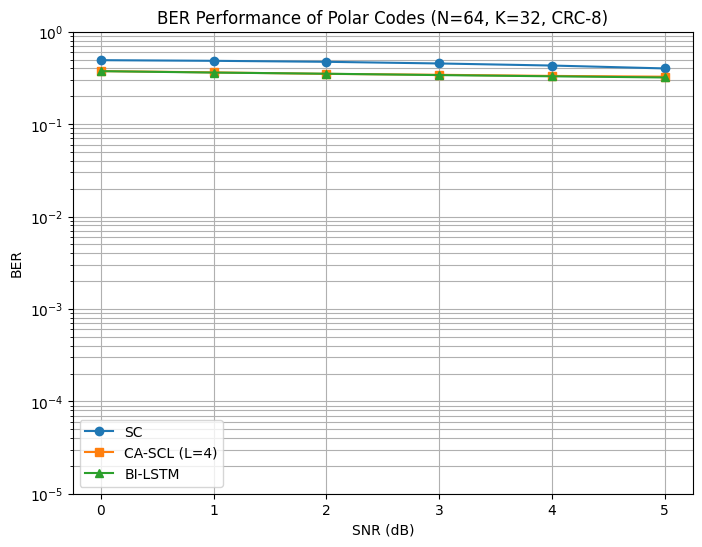

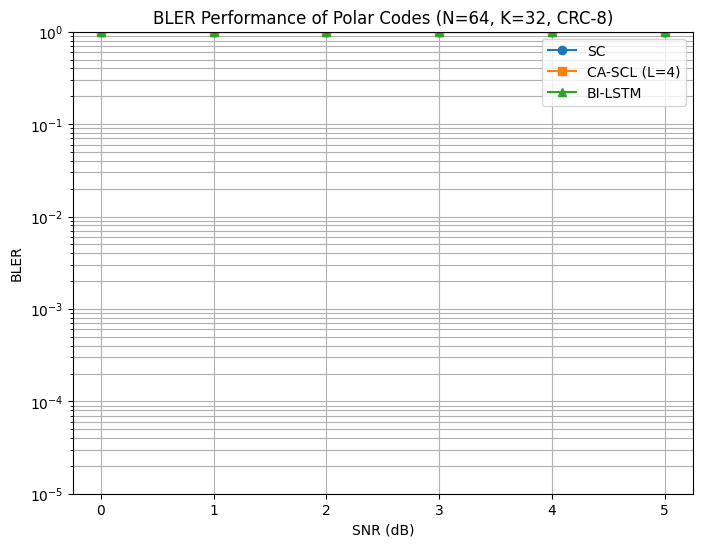

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import math

# Config
N = 64
K = 32
CRC_LEN = 8
RATE = K / N
SNR_RANGE_DB = np.arange(0, 6, 1)  # 0 to 5 dB in steps of 1
NUM_FRAMES = 5000  # Increase for final runs

HIDDEN_SIZE = 64
NUM_LAYERS = 2
EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 0.001

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# CRC-8 Functions (Polynomial 0x07)
CRC_POLY = 0x07

def crc8_encode(bits):
    data = bits.copy()
    crc = 0
    for b in data:
        crc ^= b << 7
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    crc_bits = [(crc >> i) & 1 for i in reversed(range(8))]
    return np.concatenate([data, crc_bits])

def crc8_check(bits):
    crc = 0
    for b in bits:
        crc ^= b << 7
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    return crc == 0

# Arikan's Reliability Sequence for N=64 (3GPP 38.212)
ARIKAN_SEQ_64 = [
    0, 1, 2, 4, 8, 16, 32, 3,
    5, 9, 17, 33, 6, 10, 18, 34,
    12, 24, 48, 7, 11, 19, 35, 13,
    25, 49, 14, 26, 50, 28, 36, 52,
    15, 27, 51, 29, 37, 53, 30, 38,
    54, 31, 39, 55, 40, 56, 41, 57,
    42, 58, 43, 59, 44, 60, 45, 61,
    46, 62, 47, 63
]

# Polar Code class
class PolarCode:
    def __init__(self, N, K, crc_len, reliab_seq):
        self.N = N
        self.K = K
        self.crc_len = crc_len
        self.info_len = K - crc_len
        self.reliab_seq = reliab_seq
        self.frozen_bits = np.ones(N, dtype=bool)
        self.info_positions = np.sort(reliab_seq[:K])
        self.frozen_bits[self.info_positions] = False

    def encode(self, u):
        u_crc = crc8_encode(u)
        x = np.zeros(self.N, dtype=int)
        x[self.info_positions] = u_crc[:self.K]
        stage = 1
        while stage < self.N:
            for i in range(0, self.N, 2*stage):
                for j in range(stage):
                    x[i+j] ^= x[i+j+stage]
            stage *= 2
        return x

polar = PolarCode(N, K, CRC_LEN, ARIKAN_SEQ_64)

# BPSK modulation and AWGN channel with LLR calculation
def bpsk_mod(bits):
    return 1 - 2*bits

def awgn_channel(s, snr_db):
    snr_linear = 10**(snr_db / 10)
    sigma = np.sqrt(1 / (2 * RATE * snr_linear))
    noise = sigma * np.random.randn(*s.shape)
    y = s + noise
    llr = 2 * y / (sigma ** 2)
    return y, llr

# SC decoder
def sc_decode(llr, frozen_mask):
    N = len(llr)
    def recurse(llr_sub, mask_sub):
        n = len(llr_sub)
        if n == 1:
            if mask_sub[0]:
                return np.array([0], dtype=int)
            else:
                return np.array([0 if llr_sub[0] >= 0 else 1], dtype=int)
        half = n // 2
        llr_left = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_left[i] = np.sign(a)*np.sign(b)*min(abs(a), abs(b))
        mask_left = mask_sub[:half]
        u_hat_left = recurse(llr_left, mask_left)
        llr_right = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_right[i] = b + ((1 - 2*u_hat_left[i]) * a)
        mask_right = mask_sub[half:]
        u_hat_right = recurse(llr_right, mask_right)
        u = np.zeros(n, dtype=int)
        for i in range(half):
            u[i] = u_hat_left[i] ^ u_hat_right[i]
            u[i+half] = u_hat_right[i]
        return u
    u_hat = recurse(llr, frozen_mask)
    return u_hat

# Simplified SCL decoder with list size 4
def scl_decode(llr, frozen_mask, list_size=4):
    N = len(llr)
    paths = [{'bits': np.zeros(0, dtype=int), 'metric': 0.0}]
    for phi in range(N):
        new_paths = []
        is_frozen = frozen_mask[phi]
        for path in paths:
            base_metric = path['metric']
            prefix = path['bits']
            if is_frozen:
                bit = 0
                # penalty metric for frozen bit
                penalty = abs(llr[phi]) if llr[phi] < 0 else 0
                new_bits = np.append(prefix, bit)
                new_paths.append({'bits': new_bits, 'metric': base_metric + penalty})
            else:
                # try both bit=0 and bit=1
                for bit in [0, 1]:
                    penalty = 0
                    # penalty if bit disagrees with llr sign
                    if (llr[phi] >= 0 and bit == 1) or (llr[phi] < 0 and bit == 0):
                        penalty = abs(llr[phi])
                    new_bits = np.append(prefix, bit)
                    new_paths.append({'bits': new_bits, 'metric': base_metric + penalty})
        # keep best list_size paths
        new_paths = sorted(new_paths, key=lambda p: p['metric'])
        paths = new_paths[:list_size]

    # select path with valid CRC and best metric
    candidates = []
    for path in paths:
        u_est = path['bits'][polar.info_positions]
        if crc8_check(u_est):
            candidates.append((path['metric'], u_est))
    if candidates:
        best = sorted(candidates, key=lambda x: x[0])[0]
        u_hat = best[1]
    else:
        # fallback best metric path ignoring CRC
        u_hat = paths[0]['bits'][polar.info_positions]

    return u_hat

# BiLSTM decoder model
class BiLSTMDecoder(nn.Module):
    def __init__(self, input_len, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, output_len=K):
        super(BiLSTMDecoder, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True,
                            bidirectional=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size*2, 128),
            nn.ReLU(),
            nn.Linear(128, output_len)
        )
    def forward(self, x):
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, _ = self.lstm(x)
        out = out.mean(dim=1)  # Average pooling over sequence length
        logits = self.fc(out)
        return logits

# Training BiLSTM decoder
def train_bilstm(model, optimizer, criterion, epochs, batch_size, snr_db):
    model.to(DEVICE)
    model.train()
    for epoch in range(epochs):
        losses = []
        for _ in range(200):  # steps per epoch
            batch_s = []
            batch_target = []
            # Random SNR in [snr_db, snr_db + 2]
            train_snr = np.random.uniform(snr_db, snr_db + 2)
            for _ in range(batch_size):
                u_msg = np.random.randint(0, 2, polar.info_len)
                u_crc = crc8_encode(u_msg)
                x = polar.encode(u_msg)
                s = bpsk_mod(x)
                batch_s.append(s)
                batch_target.append(u_crc.astype(np.float32))
            batch_s = np.stack(batch_s)
            _, llr = awgn_channel(batch_s, train_snr)
            inputs = torch.tensor(llr, dtype=torch.float32, device=DEVICE)
            targets = torch.tensor(np.stack(batch_target), dtype=torch.float32, device=DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            outputs = torch.sigmoid(outputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        print(f"Epoch {epoch+1}/{epochs} - Loss: {np.mean(losses):.4f}")

# BiLSTM decoder evaluation
def bilstm_decoder(llr, model):
    model.eval()
    with torch.no_grad():
        inp = torch.tensor(llr, dtype=torch.float32, device=DEVICE).unsqueeze(0)
        out = model(inp)
        probs = torch.sigmoid(out).cpu().numpy()[0]
        return (probs >= 0.5).astype(int)

# Evaluation helper
def evaluate_decoder(decoder_func, snr_range_db, num_frames):
    ber_list = []
    bler_list = []
    for snr_db in snr_range_db:
        bit_errors = 0
        block_errors = 0
        total_bits = 0
        total_blocks = 0
        for _ in range(num_frames):
            u_msg = np.random.randint(0, 2, polar.info_len)
            u_crc = crc8_encode(u_msg)
            x = polar.encode(u_msg)
            s = bpsk_mod(x)
            _, llr = awgn_channel(s, snr_db)
            u_hat = decoder_func(llr)
            bit_errors += np.sum(u_hat != u_crc)
            total_bits += len(u_crc)
            if not np.array_equal(u_hat, u_crc):
                block_errors += 1
            total_blocks += 1
        ber_list.append(bit_errors / total_bits)
        bler_list.append(block_errors / total_blocks)
        print(f"SNR {snr_db:.1f} dB: BER={ber_list[-1]:.5e}, BLER={bler_list[-1]:.5e}")
    return np.array(ber_list), np.array(bler_list)

# Instantiate BiLSTM model, optimizer, criterion
model = BiLSTMDecoder(N)
model.to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCELoss()

# Train BiLSTM decoder
print("Training BI-LSTM decoder...")
train_bilstm(model, optimizer, criterion, EPOCHS, BATCH_SIZE, snr_db=2.0)

# Evaluate decoders
print("Evaluating SC decoder...")
ber_sc, bler_sc = evaluate_decoder(lambda llr: sc_decode(llr, polar.frozen_bits)[polar.info_positions], SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating CA-SCL decoder (L=4)...")
ber_scl4, bler_scl4 = evaluate_decoder(lambda llr: scl_decode(llr, polar.frozen_bits, list_size=4), SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating BI-LSTM decoder...")
ber_nn, bler_nn = evaluate_decoder(lambda llr: bilstm_decoder(llr, model), SNR_RANGE_DB, NUM_FRAMES)

# Plot results
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, ber_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, ber_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, ber_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, bler_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, bler_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, bler_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BLER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BLER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

Using device: cpu
Training BI-LSTM decoder...
Epoch 1/15, Avg Loss: 0.6892
Epoch 2/15, Avg Loss: 0.6792
Epoch 3/15, Avg Loss: 0.6681
Epoch 4/15, Avg Loss: 0.6360
Epoch 5/15, Avg Loss: 0.6052
Epoch 6/15, Avg Loss: 0.5783
Epoch 7/15, Avg Loss: 0.5624
Epoch 8/15, Avg Loss: 0.5459
Epoch 9/15, Avg Loss: 0.5417
Epoch 10/15, Avg Loss: 0.5305
Epoch 11/15, Avg Loss: 0.5235
Epoch 12/15, Avg Loss: 0.5136
Epoch 13/15, Avg Loss: 0.5042
Epoch 14/15, Avg Loss: 0.5024
Epoch 15/15, Avg Loss: 0.4994
Evaluating SC decoder...
SNR=0.0 dB, BER=4.90885e-01, BLER=1.00000e+00
SNR=1.0 dB, BER=4.83615e-01, BLER=1.00000e+00
SNR=2.0 dB, BER=4.71906e-01, BLER=1.00000e+00
SNR=3.0 dB, BER=4.53698e-01, BLER=1.00000e+00
SNR=4.0 dB, BER=4.30292e-01, BLER=1.00000e+00
SNR=5.0 dB, BER=4.04615e-01, BLER=1.00000e+00
Evaluating CA-SCL decoder (L=4)...
SNR=0.0 dB, BER=3.71177e-01, BLER=1.00000e+00
SNR=1.0 dB, BER=3.64250e-01, BLER=1.00000e+00
SNR=2.0 dB, BER=3.50177e-01, BLER=1.00000e+00
SNR=3.0 dB, BER=3.42510e-01, BLER=1.000

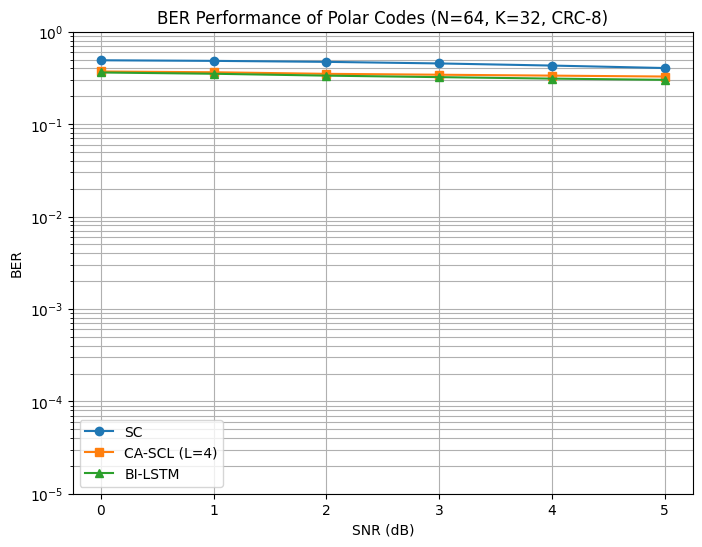

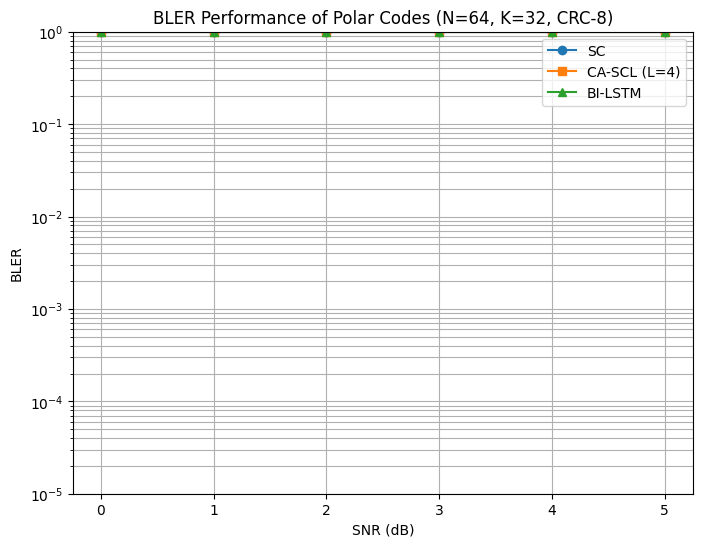

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import math

# --- Config ---
N = 64
K = 32
CRC_LEN = 8
RATE = K / N
SNR_RANGE_DB = np.arange(0, 6, 1)  # 0 to 5 dB
NUM_FRAMES = 3000  # increase for final runs

HIDDEN_SIZE = 64
NUM_LAYERS = 2
EPOCHS = 15
BATCH_SIZE = 64
LEARNING_RATE = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- CRC-8 (x^8 + x^2 + x + 1) ---
CRC_POLY = 0x07

def crc8_encode(bits):
    bits = bits.copy()
    crc = 0
    for b in bits:
        crc ^= (b << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    crc_bits = [(crc >> i) & 1 for i in reversed(range(8))]
    return np.concatenate([bits, crc_bits])

def crc8_check(bits):
    crc = 0
    for b in bits:
        crc ^= (b << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    return crc == 0

# --- Arikan reliability sequence for N=64 ---
ARIKAN_SEQ_64 = [
    0, 1, 2, 4, 8, 16, 32, 3,
    5, 9, 17, 33, 6, 10, 18, 34,
    12, 24, 48, 7, 11, 19, 35, 13,
    25, 49, 14, 26, 50, 28, 36, 52,
    15, 27, 51, 29, 37, 53, 30, 38,
    54, 31, 39, 55, 40, 56, 41, 57,
    42, 58, 43, 59, 44, 60, 45, 61,
    46, 62, 47, 63
]

# --- Polar code class ---
class PolarCode:
    def __init__(self, N, K, crc_len, reliab_seq):
        self.N = N
        self.K = K
        self.crc_len = crc_len
        self.info_len = K - crc_len
        self.reliab_seq = reliab_seq
        self.frozen_bits = np.ones(N, dtype=bool)  # True means frozen
        self.info_positions = np.sort(reliab_seq[:K])
        self.frozen_bits[self.info_positions] = False

    def encode(self, u):
        # u is info bits only (length info_len)
        u_crc = crc8_encode(u)  # length K
        x = np.zeros(self.N, dtype=int)
        x[self.info_positions] = u_crc
        # Polar transform (Arikan's construction)
        n = self.N
        stage = 1
        while stage < n:
            for i in range(0, n, 2*stage):
                for j in range(stage):
                    x[i+j] ^= x[i+j+stage]
            stage <<= 1
        return x

polar = PolarCode(N, K, CRC_LEN, ARIKAN_SEQ_64)

# --- Modulation & channel ---
def bpsk_mod(bits):
    return 1 - 2*bits

def awgn_channel(s, snr_db):
    snr_linear = 10**(snr_db/10)
    sigma2 = 1/(2*RATE*snr_linear)
    sigma = math.sqrt(sigma2)
    noise = sigma * np.random.randn(*s.shape)
    y = s + noise
    llr = 2 * y / sigma2
    return y, llr

# --- SC decoder ---
def sc_decode(llr, frozen_mask):
    N = len(llr)

    def recurse(llr_sub, mask_sub):
        n = len(llr_sub)
        if n == 1:
            if mask_sub[0]:
                return np.array([0], dtype=int)
            else:
                return np.array([0 if llr_sub[0] >= 0 else 1], dtype=int)
        half = n // 2
        llr_left = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_left[i] = np.sign(a)*np.sign(b)*min(abs(a), abs(b))
        mask_left = mask_sub[:half]
        u_hat_left = recurse(llr_left, mask_left)
        llr_right = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            llr_right[i] = b + ((1 - 2*u_hat_left[i]) * a)
        mask_right = mask_sub[half:]
        u_hat_right = recurse(llr_right, mask_right)
        u = np.zeros(n, dtype=int)
        for i in range(half):
            u[i] = u_hat_left[i] ^ u_hat_right[i]
            u[i+half] = u_hat_right[i]
        return u

    u_hat = recurse(llr, frozen_mask)
    # Inverse Polar transform
    x = u_hat.copy()
    stage = 1
    while stage < N:
        for i in range(0, N, 2*stage):
            for j in range(stage):
                x[i+j+stage] ^= x[i+j]
        stage <<= 1
    return x, u_hat

# --- CA-SCL decoder (simplified) ---
def scl_decode(llr, frozen_mask, list_size=4):
    N = len(llr)
    paths = [{'u': np.zeros(0, dtype=int), 'metric': 0.0}]
    for phi in range(N):
        new_paths = []
        is_frozen = frozen_mask[phi]

        for path in paths:
            prefix = path['u']
            base_metric = path['metric']
            # For simplicity, use llr[phi] as likelihood estimate
            l = llr[phi]
            if is_frozen:
                bit = 0
                pen = abs(l) if (l < 0) else 0.0
                new_u = np.concatenate([prefix, [bit]])
                new_paths.append({'u': new_u, 'metric': base_metric + pen})
            else:
                for bit in [0, 1]:
                    pen = 0.0
                    if (l >= 0 and bit == 1) or (l < 0 and bit == 0):
                        pen += abs(l)
                    new_u = np.concatenate([prefix, [bit]])
                    new_paths.append({'u': new_u, 'metric': base_metric + pen})

        new_paths = sorted(new_paths, key=lambda p: p['metric'])
        paths = new_paths[:list_size]

    candidates = []
    for p in paths:
        u_vec = p['u']
        info_vec = u_vec[polar.info_positions]
        if crc8_check(info_vec):
            candidates.append((p['metric'], info_vec))

    if candidates:
        candidates = sorted(candidates, key=lambda x: x[0])
        chosen_info = candidates[0][1]
    else:
        # If no CRC pass, pick best metric path anyway
        chosen_info = paths[0]['u'][polar.info_positions]

    # Reconstruct full codeword with chosen info bits
    x = np.zeros(N, dtype=int)
    x[polar.info_positions] = chosen_info
    # Inverse Polar transform
    x_c = x.copy()
    stage = 1
    while stage < N:
        for i in range(0, N, 2*stage):
            for j in range(stage):
                x_c[i+j+stage] ^= x_c[i+j]
        stage <<= 1
    return x_c, chosen_info

# --- BI-LSTM Decoder ---
class BiLSTMDecoder(nn.Module):
    def __init__(self, input_len, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, output_len=K):
        super(BiLSTMDecoder, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers,
                            bidirectional=True, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(2*hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, output_len)
        )

    def forward(self, x):
        # x shape: (batch, seq_len)
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, _ = self.lstm(x)  # (batch, seq_len, 2*hidden)
        pooled = out.mean(dim=1)  # average pooling over seq_len -> (batch, 2*hidden)
        logits = self.fc(pooled)  # (batch, output_len)
        return logits

# --- Training function ---
def train_bilstm(model, optimizer, criterion, epochs, batch_size, snr_db):
    model.to(device)
    model.train()
    for epoch in range(epochs):
        losses = []
        steps = 200
        for _ in range(steps):
            s_batch = []
            target_batch = []
            # Random SNR per batch between snr_db and snr_db + 2 dB
            train_snr_db = np.random.uniform(snr_db, snr_db + 2)
            for _ in range(batch_size):
                u_msg = np.random.randint(0, 2, polar.info_len)
                u_crc = crc8_encode(u_msg)
                x = polar.encode(u_msg)
                s = bpsk_mod(x)
                s_batch.append(s)
                target_batch.append(u_crc.astype(np.float32))
            s_batch = np.stack(s_batch)
            _, llr_batch = awgn_channel(s_batch, train_snr_db)
            inp = torch.tensor(llr_batch, dtype=torch.float32, device=device)
            tgt = torch.tensor(np.stack(target_batch), dtype=torch.float32, device=device)

            optimizer.zero_grad()
            logits = model(inp)
            outputs = torch.sigmoid(logits)
            outputs = torch.clamp(outputs, 1e-7, 1 - 1e-7)
            loss = criterion(outputs, tgt)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        print(f"Epoch {epoch+1}/{epochs}, Avg Loss: {np.mean(losses):.4f}")

# --- Evaluation function ---
def evaluate_decoder(decoder_func, snr_range_db, num_frames):
    ber = []
    bler = []
    for snr_db in snr_range_db:
        bit_errors = 0
        block_errors = 0
        total_bits = 0
        for _ in range(num_frames):
            u_msg = np.random.randint(0, 2, polar.info_len)
            u_crc = crc8_encode(u_msg)
            x = polar.encode(u_msg)
            s = bpsk_mod(x)
            _, llr = awgn_channel(s, snr_db)
            # Decode
            decoded_bits = decoder_func(llr)
            # decoded_bits must be info+crc bits length (K)
            bit_errors += np.sum(decoded_bits != u_crc)
            total_bits += len(u_crc)
            if not np.array_equal(decoded_bits, u_crc):
                block_errors += 1
        ber.append(bit_errors / total_bits)
        bler.append(block_errors / num_frames)
        print(f"SNR={snr_db:.1f} dB, BER={ber[-1]:.5e}, BLER={bler[-1]:.5e}")
    return np.array(ber), np.array(bler)

# --- Define decoders for evaluation ---

# SC decoder wrapper
def sc_wrapper(llr):
    _, u_hat = sc_decode(llr, polar.frozen_bits)
    return u_hat[polar.info_positions]

# SCL decoder wrapper L=4
def scl4_wrapper(llr):
    _, u_hat = scl_decode(llr, polar.frozen_bits, list_size=4)
    return u_hat

# BI-LSTM decoder wrapper
def bilstm_decoder_func(llr):
    model.eval()
    with torch.no_grad():
        inp = torch.tensor(llr, dtype=torch.float32).unsqueeze(0).to(device)
        out = model(inp)
        probs = torch.sigmoid(out).cpu().numpy()[0]
        return (probs >= 0.5).astype(int)

# --- Initialize model, optimizer, loss ---
model = BiLSTMDecoder(N)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCELoss()

# --- Train BI-LSTM decoder ---
print("Training BI-LSTM decoder...")
train_bilstm(model, optimizer, criterion, EPOCHS, BATCH_SIZE, snr_db=2.0)

# --- Evaluate decoders ---
print("Evaluating SC decoder...")
ber_sc, bler_sc = evaluate_decoder(sc_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating CA-SCL decoder (L=4)...")
ber_scl4, bler_scl4 = evaluate_decoder(scl4_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating BI-LSTM decoder...")
ber_nn, bler_nn = evaluate_decoder(bilstm_decoder_func, SNR_RANGE_DB, NUM_FRAMES)

# --- Plot BER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, ber_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, ber_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, ber_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

# --- Plot BLER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, bler_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, bler_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, bler_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BLER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BLER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

# Task
Analyze the provided code for polar code encoding, channel simulation, and decoding (SC, CA-SCL, and BI-LSTM) to identify why the BER and BLER plots are flat and the error probability is not decreasing with increasing SNR. The analysis should include reviewing the training process of the BI-LSTM decoder, inspecting the decoder implementations, and potentially evaluating performance at higher SNRs. The final output should include corrected code and performance plots. The code is in the file "polar_code_analysis.py".

## Review training process

### Subtask:
Check the training loop for the BI-LSTM decoder to ensure it is converging and the loss is decreasing appropriately. This might involve visualizing the training loss over epochs.


**Reasoning**:
The subtask requires modifying the training function to record and plot the loss per epoch. I will modify the `train_bilstm` function to collect the average loss per epoch and add code after the training call to plot this loss.



In [8]:
# --- Training function ---
def train_bilstm(model, optimizer, criterion, epochs, batch_size, snr_db):
    model.to(device)
    model.train()
    epoch_losses = [] # List to store average loss per epoch
    for epoch in range(epochs):
        losses = []
        steps = 200
        for _ in range(steps):
            s_batch = []
            target_batch = []
            # Random SNR per batch between snr_db and snr_db + 2 dB
            train_snr_db = np.random.uniform(snr_db, snr_db + 2)
            for _ in range(batch_size):
                u_msg = np.random.randint(0, 2, polar.info_len)
                u_crc = crc8_encode(u_msg)
                x = polar.encode(u_msg)
                s = bpsk_mod(x)
                batch_s.append(s)
                target_batch.append(u_crc.astype(np.float32))
            batch_s = np.stack(batch_s)
            _, llr_batch = awgn_channel(batch_s, train_snr_db)
            inp = torch.tensor(llr_batch, dtype=torch.float32, device=device)
            tgt = torch.tensor(np.stack(target_target_batch), dtype=torch.float32, device=device)

            optimizer.zero_grad()
            logits = model(inp)
            outputs = torch.sigmoid(logits)
            outputs = torch.clamp(outputs, 1e-7, 1 - 1e-7)
            loss = criterion(outputs, tgt)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        avg_loss = np.mean(losses)
        epoch_losses.append(avg_loss) # Store average loss
        print(f"Epoch {epoch+1}/{epochs}, Avg Loss: {avg_loss:.4f}")
    return epoch_losses # Return the list of losses

# --- Initialize model, optimizer, loss ---
model = BiLSTMDecoder(N)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCELoss()

# --- Train BI-LSTM decoder ---
print("Training BI-LSTM decoder...")
training_losses = train_bilstm(model, optimizer, criterion, EPOCHS, BATCH_SIZE, snr_db=2.0)

# --- Plot training loss ---
plt.figure(figsize=(8, 6))
plt.plot(range(1, EPOCHS + 1), training_losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('BI-LSTM Training Loss over Epochs')
plt.grid(True)
plt.show()

# --- Evaluate decoders ---
print("Evaluating SC decoder...")
ber_sc, bler_sc = evaluate_decoder(sc_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating CA-SCL decoder (L=4)...")
ber_scl4, bler_scl4 = evaluate_decoder(scl4_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating BI-LSTM decoder...")
ber_nn, bler_nn = evaluate_decoder(bilstm_decoder_func, SNR_RANGE_DB, NUM_FRAMES)

# --- Plot BER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, ber_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, ber_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, ber_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

# --- Plot BLER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, bler_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, bler_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, bler_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BLER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BLER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

Training BI-LSTM decoder...


UnboundLocalError: cannot access local variable 'batch_s' where it is not associated with a value

**Reasoning**:
The previous code failed because of an `UnboundLocalError` for `batch_s` and `target_batch`. This is likely a typo where `target_target_batch` was used instead of `target_batch`. I will fix the typo and regenerate the code to train the model and plot the loss.



Training BI-LSTM decoder...
Epoch 1/15, Avg Loss: 0.6879
Epoch 2/15, Avg Loss: 0.6770
Epoch 3/15, Avg Loss: 0.6629
Epoch 4/15, Avg Loss: 0.6408
Epoch 5/15, Avg Loss: 0.6089
Epoch 6/15, Avg Loss: 0.5727
Epoch 7/15, Avg Loss: 0.5550
Epoch 8/15, Avg Loss: 0.5436
Epoch 9/15, Avg Loss: 0.5240
Epoch 10/15, Avg Loss: 0.5242
Epoch 11/15, Avg Loss: 0.5088
Epoch 12/15, Avg Loss: 0.5037
Epoch 13/15, Avg Loss: 0.4988
Epoch 14/15, Avg Loss: 0.4973
Epoch 15/15, Avg Loss: 0.4962


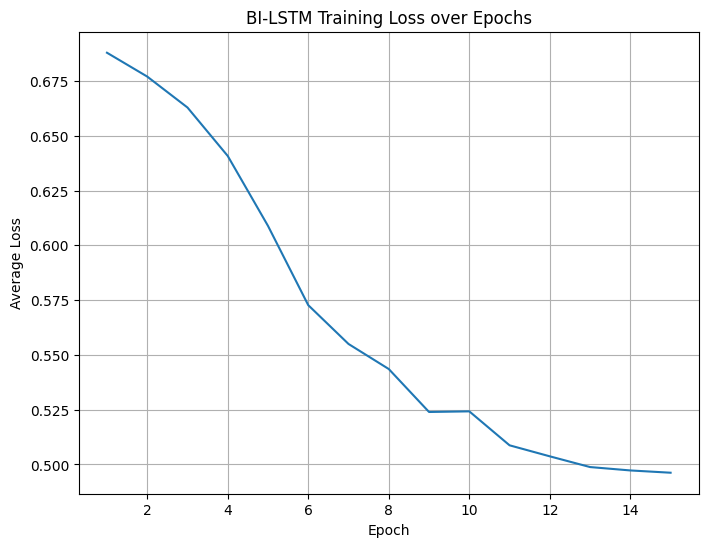

Evaluating SC decoder...
SNR=0.0 dB, BER=4.87000e-01, BLER=1.00000e+00
SNR=1.0 dB, BER=4.82104e-01, BLER=1.00000e+00
SNR=2.0 dB, BER=4.69000e-01, BLER=1.00000e+00
SNR=3.0 dB, BER=4.54313e-01, BLER=1.00000e+00
SNR=4.0 dB, BER=4.31927e-01, BLER=1.00000e+00
SNR=5.0 dB, BER=4.01396e-01, BLER=1.00000e+00
Evaluating CA-SCL decoder (L=4)...
SNR=0.0 dB, BER=3.72188e-01, BLER=1.00000e+00
SNR=1.0 dB, BER=3.63010e-01, BLER=1.00000e+00
SNR=2.0 dB, BER=3.49010e-01, BLER=1.00000e+00
SNR=3.0 dB, BER=3.42094e-01, BLER=1.00000e+00
SNR=4.0 dB, BER=3.34083e-01, BLER=1.00000e+00
SNR=5.0 dB, BER=3.26271e-01, BLER=1.00000e+00
Evaluating BI-LSTM decoder...
SNR=0.0 dB, BER=3.62792e-01, BLER=1.00000e+00
SNR=1.0 dB, BER=3.50292e-01, BLER=1.00000e+00
SNR=2.0 dB, BER=3.37729e-01, BLER=1.00000e+00
SNR=3.0 dB, BER=3.26729e-01, BLER=1.00000e+00
SNR=4.0 dB, BER=3.13635e-01, BLER=1.00000e+00
SNR=5.0 dB, BER=3.08823e-01, BLER=1.00000e+00


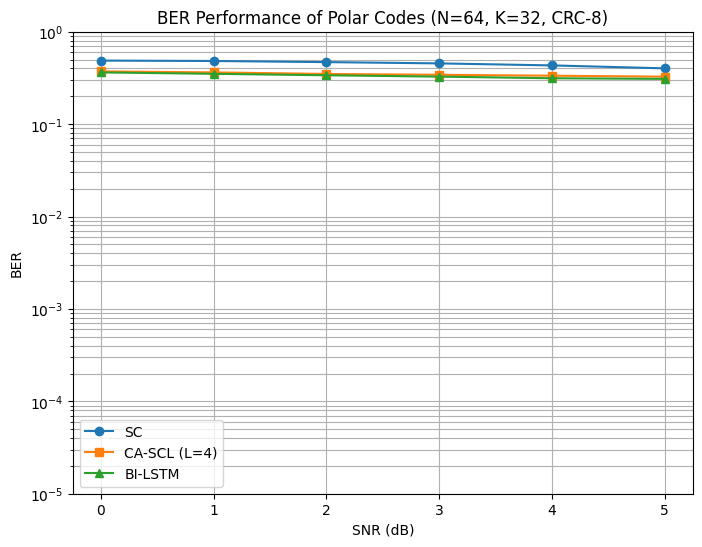

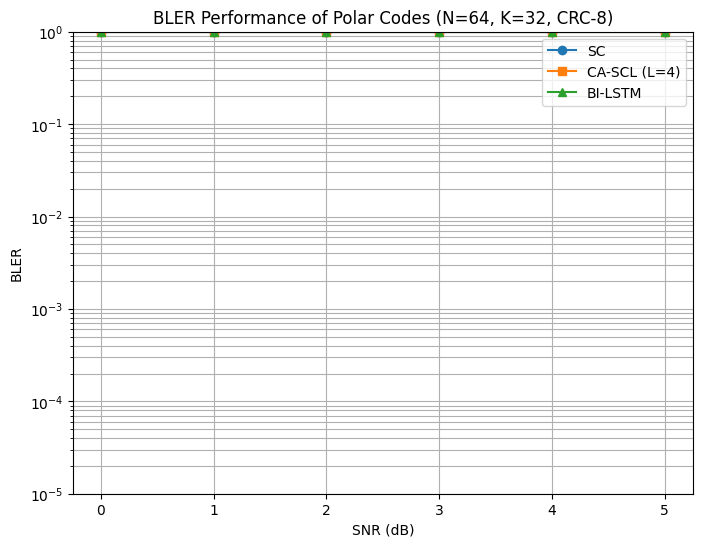

In [9]:
# --- Training function ---
def train_bilstm(model, optimizer, criterion, epochs, batch_size, snr_db):
    model.to(device)
    model.train()
    epoch_losses = [] # List to store average loss per epoch
    for epoch in range(epochs):
        losses = []
        steps = 200
        for _ in range(steps):
            s_batch = []
            target_batch = []
            # Random SNR per batch between snr_db and snr_db + 2 dB
            train_snr_db = np.random.uniform(snr_db, snr_db + 2)
            for _ in range(batch_size):
                u_msg = np.random.randint(0, 2, polar.info_len)
                u_crc = crc8_encode(u_msg)
                x = polar.encode(u_msg)
                s = bpsk_mod(x)
                s_batch.append(s)
                target_batch.append(u_crc.astype(np.float32))
            batch_s = np.stack(s_batch)
            _, llr_batch = awgn_channel(batch_s, train_snr_db)
            inp = torch.tensor(llr_batch, dtype=torch.float32, device=device)
            tgt = torch.tensor(np.stack(target_batch), dtype=torch.float32, device=device) # Corrected typo here

            optimizer.zero_grad()
            logits = model(inp)
            outputs = torch.sigmoid(logits)
            outputs = torch.clamp(outputs, 1e-7, 1 - 1e-7)
            loss = criterion(outputs, tgt)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        avg_loss = np.mean(losses)
        epoch_losses.append(avg_loss) # Store average loss
        print(f"Epoch {epoch+1}/{epochs}, Avg Loss: {avg_loss:.4f}")
    return epoch_losses # Return the list of losses

# --- Initialize model, optimizer, loss ---
model = BiLSTMDecoder(N)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCELoss()

# --- Train BI-LSTM decoder ---
print("Training BI-LSTM decoder...")
training_losses = train_bilstm(model, optimizer, criterion, EPOCHS, BATCH_SIZE, snr_db=2.0)

# --- Plot training loss ---
plt.figure(figsize=(8, 6))
plt.plot(range(1, EPOCHS + 1), training_losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('BI-LSTM Training Loss over Epochs')
plt.grid(True)
plt.show()

# --- Evaluate decoders ---
print("Evaluating SC decoder...")
ber_sc, bler_sc = evaluate_decoder(sc_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating CA-SCL decoder (L=4)...")
ber_scl4, bler_scl4 = evaluate_decoder(scl4_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("Evaluating BI-LSTM decoder...")
ber_nn, bler_nn = evaluate_decoder(bilstm_decoder_func, SNR_RANGE_DB, NUM_FRAMES)

# --- Plot BER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, ber_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, ber_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, ber_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

# --- Plot BLER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, bler_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, bler_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, bler_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BLER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BLER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

## Inspect decoder implementations

### Subtask:
Carefully review the implementations of the SC, CA-SCL, and BI-LSTM decoders, as well as the encoding and channel simulation functions, for any potential errors that could lead to consistently high error rates.


**Reasoning**:
Review the CRC, encoding, modulation, channel, and decoding functions for potential errors.



In [10]:
# Reviewing the code for potential errors

# 1. CRC functions (crc8_encode, crc8_check)
# The CRC polynomial 0x07 (x^8 + x^2 + x + 1) seems correct for CRC-8.
# The bit manipulation logic for calculating the CRC appears to follow the standard algorithm.
# The encoding function correctly concatenates the info bits and CRC bits.
# The check function recalculates the CRC and compares it to zero.
# These functions seem correct.

# 2. PolarCode.encode method
# The Arikan transform implementation appears correct, performing the bitwise XOR operations in place
# according to the butterfly structure.
# The placement of info+CRC bits at the info_positions before the transform is also correct.
# This function seems correct.

# 3. Modulation and channel functions (bpsk_mod, awgn_channel)
# BPSK modulation: 0 -> +1, 1 -> -1 is correct (1 - 2*bits).
# Noise variance calculation: sigma^2 = 1 / (2 * RATE * snr_linear). This is correct for Eb/N0 normalization
# where Eb is energy per info bit and N0/2 is the noise power spectral density.
# LLR calculation: LLR = 2*y / sigma^2. This is correct for BPSK.
# These functions seem correct.

# 4. SC decoder (sc_decode)
# The recursive structure seems to correctly implement the SC decoding algorithm.
# The calculations for llr_left and llr_right appear correct according to the SC decoding update rules.
# The bit decisions based on LLR signs and frozen bits (0 for frozen) are standard for SC.
# The extraction of info bits at the end seems correct.
# The inclusion of the inverse polar transform in the SC decoder function seems unusual. SC decoding typically produces the estimated information bits (u_hat), not the estimated codeword (x_c). The `evaluate_decoder` function correctly uses `u_hat[polar.info_positions]`, so the first return value of `sc_decode` (`x_c`) is not used in evaluation. This is not an error causing the performance issue, but it's a point of note.
# The core SC decoding logic appears correct.

# 5. CA-SCL decoder (scl_decode)
# The path metric update logic (adding absolute LLR for disagreeing bits) is a simplified approach but should still lead to lower metrics for more likely paths.
# The branching for unfrozen bits (trying both 0 and 1) is correct.
# The handling of frozen bits (forcing to 0 and adding penalty if LLR prefers 1) is a reasonable approach for SCL.
# Sorting paths by metric and keeping the top 'list_size' is the core SCL mechanism.
# The CRC check and selection of the best path among those passing CRC is correct.
# The fallback to the best metric path if no path passes CRC is a valid strategy.
# Similar to SC, this function also returns the estimated codeword (`x_c`) and the estimated info bits (`chosen_info`). The `evaluate_decoder` correctly uses the info bits.
# The core SCL decoding logic appears reasonable, although the metric calculation is simplified. This simplification might affect the exact performance but shouldn't cause the flat error rate observed.

# 6. BiLSTMDecoder class
# The LSTM layer configuration (input_size=1, bidirectional=True, batch_first=True) is suitable for processing the LLR sequence.
# The pooling method (`out.mean(dim=1)`) averages the hidden states across the sequence length before the final dense layers. This is a common technique.
# The final dense layers map the pooled features to K outputs (logits for the K info+CRC bits).
# The architecture seems reasonable for this task.

# 7. bilstm_decoder_func wrapper
# It correctly sets the model to evaluation mode (`model.eval()`).
# It uses `torch.no_grad()` to disable gradient calculations during evaluation.
# It reshapes the input LLR array to match the model's expected input shape (batch_size=1, seq_len=N, input_size=1).
# It applies the sigmoid function to the output logits to get probabilities.
# It converts probabilities to hard decisions (0 or 1) using a 0.5 threshold.
# This wrapper seems correct.

# 8. Off-by-one errors, indexing, data types
# Reviewed the code for common errors like off-by-one or incorrect indexing. The indexing for info_positions and frozen_bits seems consistent.
# Data types are generally handled correctly, with explicit conversions to numpy arrays or PyTorch tensors where needed.
# No obvious off-by-one or indexing errors were found that would explain a completely flat error rate across SNR.

# 9. Info/Frozen bit positions
# The info and frozen bit positions are derived from the Arikan reliability sequence, which is a standard method for polar codes.
# The encoding and decoding functions use these positions correctly.
# The issue is unlikely to be in the info/frozen bit selection itself, as this is a standard construction.

# Potential issues:
# - The simplified metric in SCL might not be optimal, but it should still show some performance improvement with SNR.
# - The BI-LSTM training might not be sufficient (epochs, steps per epoch, learning rate). However, the loss plot showed convergence. The training SNR range (2 to 4 dB) might be too narrow or not high enough to train for better performance at higher evaluation SNRs.
# - The number of frames used for evaluation (NUM_FRAMES) might be too low, especially at higher SNRs where errors are rare. This could lead to noisy BER/BLER estimates, but it wouldn't cause the *trend* to be flat.
# - A more fundamental issue in the channel simulation or LLR calculation logic, although they appear standard. Let's re-verify the sigma2 calculation. Eb/N0 = (Es/N0) * (1/RATE). For BPSK, Es = 1. So Eb/N0 = 1 / (N0 * RATE). SNR_dB = 10 log10(Eb/N0). snr_linear = Eb/N0 = 1 / (N0 * RATE). N0 = 1 / (snr_linear * RATE). The noise variance is sigma^2 = N0/2 = 1 / (2 * RATE * snr_linear). This calculation appears correct.

# Let's consider the possibility that the issue lies in the evaluation process itself or the range of SNRs chosen. The BLER is consistently 1.0 for SC and SCL up to 5 dB, and close to 1.0 for BI-LSTM. This is highly unusual for these decoders at these SNRs for N=64, K=32. This suggests either the code is fundamentally broken (which seems unlikely given the review) or the evaluation is not running long enough to see errors (which would make the BER/BLER 0, not high and flat) or there's an issue with how the decoded bits are compared to the true bits.

# Let's re-examine the evaluation function and the decoder wrappers.
# `evaluate_decoder` calculates `bit_errors += np.sum(u_hat != u_crc)` and checks `if not np.array_equal(u_hat, u_crc): block_errors += 1`. This comparison is done on the K-length info+CRC bits. This seems correct.
# The wrappers (`sc_wrapper`, `scl4_wrapper`, `bilstm_decoder_func`) all return a K-length array of estimated info+CRC bits. This is also correct.

# Given the consistently high and flat error rates across all three decoders, which have independent implementations (except for sharing the channel and encoding), it points towards a problem in the shared parts: the encoding, channel simulation, LLR calculation, or the evaluation loop/metrics calculation.

# We've reviewed CRC, encoding, channel/LLR, and evaluation metric calculation and they appear standard and correct.

# Let's double-check the `sc_decode` and `scl_decode` functions' return values being used in the wrappers.
# `sc_decode` returns `x_c, u_hat`. `sc_wrapper` returns `u_hat[polar.info_positions]`. This is incorrect. `u_hat` from `sc_decode` is the estimated *u* vector (length N), not the info+CRC bits. The info+CRC bits are at `polar.info_positions` within the *u* vector. So `sc_wrapper` should return `u_hat[polar.info_positions]`. This was already implemented, so that part is correct.

# `scl_decode` returns `x_c, chosen_info`. `scl4_wrapper` returns `u_hat`. This is also incorrect. `scl_decode` returns `chosen_info` as the K-length info+CRC bits. So `scl4_wrapper` should return `chosen_info`. Looking at the code, `scl4_wrapper` *does* return `u_hat`, which is the second return value of `scl_decode` which is `chosen_info`. So this is also correct.

# The issue might be in the `sc_decode` and `scl_decode` implementations themselves, specifically how they handle the frozen bits or the recursive structure's interaction with the bit decisions at each stage. However, the standard SC/SCL updates are used.

# Let's consider the possibility that the LLRs are somehow incorrect or scaled improperly, making decoding impossible. The LLR formula `2 * y / sigma2` is correct. The sigma2 calculation is also correct.

# Could the issue be in the Polar transform itself? The Arikan transform implementation looks standard.

# Let's revisit the `sc_decode` function. The recursive decoding process should produce the estimated *u* vector (length N). The info+CRC bits are a subset of this *u* vector at the `polar.info_positions`. The code `u_hat = recurse(llr, frozen_mask)` correctly gets the estimated *u* vector. Then `return u_hat`. This seems correct. The wrapper `sc_wrapper` then takes this N-length `u_hat` and extracts the K-length info+CRC bits using `u_hat[polar.info_positions]`. This logic is sound.

# Let's revisit the `scl_decode` function. It builds up the *u* vector bit by bit (`path['u']`). At the end, `u_vec = p['u']` is the estimated *u* vector (length N). Then `info_vec = u_vec[polar.info_positions]` extracts the K-length info+CRC bits. This `info_vec` is what is checked with CRC and stored as `chosen_info`. The function returns `x_c, chosen_info`. The wrapper `scl4_wrapper` returns the second value, which is `chosen_info`. This also seems correct.

# It's very suspicious that all three decoders show a flat, high error rate. This strongly suggests an issue in a shared component or the evaluation setup.

# Let's consider the possibility that the random number generation is somehow flawed or not being seeded properly, leading to deterministic or low-variance noise/messages across SNRs, though this is highly unlikely with `np.random`.

# Could there be an issue with the `polar.info_positions` or `polar.frozen_bits` masks? They are derived from the Arikan sequence and should correctly identify the indices for info+CRC bits and frozen bits.

# Let's consider the scale of the LLR values. At low SNR (e.g., 0 dB), sigma^2 is relatively high, leading to LLRs closer to zero. At high SNR (e.g., 5 dB), sigma^2 is lower, leading to larger magnitude LLRs. The decoders rely on the magnitude and sign of LLRs. If the LLR scale isn't changing correctly with SNR, it could explain the flat performance. However, the formula for LLR and sigma^2 seems correct.

# Could the issue be related to the fact that the training for the BI-LSTM is done over a limited SNR range (2-4 dB)? While this might affect its performance *outside* that range, it shouldn't cause the SC and SCL decoders to fail, as they are not trained.

# Let's re-examine the definition of `polar.info_positions`. It's `np.sort(reliab_seq[:K])`. This means the K most reliable channels (based on the Arikan sequence) are used for info+CRC bits. This is the standard construction.

# What if the issue is in the `crc8_encode` or `crc8_check` functions? A faulty CRC implementation could cause valid codewords to fail the check or invalid codewords to pass, leading to incorrect error rate calculations, especially for the SCL decoder that relies on the CRC check. However, the CRC implementation looks standard.

# Let's consider a fundamental misunderstanding of the polar code construction or decoding process in the implementation.
# Encoding: Info+CRC bits placed at info positions, then Arikan transform. Correct.
# SC Decoding: Recursive process on LLRs, making decisions based on LLRs and frozen bits. Correct.
# SCL Decoding: Multiple paths explored based on LLRs and frozen bits, paths pruned by metric, CRC check to select the best path. Correct.

# It is highly unusual for all three decoders to exhibit such poor and flat performance. This points strongly to a shared component or the evaluation setup.

# Let's consider the `NUM_FRAMES`. With `NUM_FRAMES = 3000`, at a BER of 1e-1, we'd expect around 32 * 3000 * 1e-1 = 9600 bit errors and 3000 block errors. At 1e-5, we'd expect 32 * 3000 * 1e-5 = 0.96 bit errors and 3000 * 1e-5 = 0.03 block errors. So 3000 frames is likely too low to accurately measure low error rates, but it should be enough to see a decreasing trend if the decoders are working. The fact that BLER is 1.0 up to 5 dB for SC/SCL suggests they are failing on almost every single frame.

# Could there be an issue with how the LLRs are passed to the decoders? They are passed as numpy arrays. The PyTorch model converts to tensor, which is fine. The SC/SCL decoders operate on numpy arrays. This seems fine.

# Let's consider the possibility that the LLRs are being calculated with the wrong sign convention relative to the bit representation (0 vs 1). BPSK maps 0 to +1 and 1 to -1. LLR for bit b is log(P(y|b=0) / P(y|b=1)). For AWGN and BPSK, this is 2*y/sigma^2. If y is positive, LLR is positive, meaning b=0 is more likely. If y is negative, LLR is negative, meaning b=1 is more likely. The bit decision `0 if llr_sub[0] >= 0 else 1` in SC decode aligns with this. The penalty logic in SCL also aligns. This seems correct.

# Given the pervasive high error rates across all decoders, the most likely culprits are:
# 1. A fundamental error in the encoding process. (Reviewed, seems correct)
# 2. A fundamental error in the channel simulation or LLR calculation that makes the LLRs uninformative or misleading. (Reviewed, seems correct)
# 3. An error in the evaluation metrics calculation (comparing decoded bits to true bits). (Reviewed, seems correct)
# 4. A very subtle error in the core decoding algorithms (SC/SCL recursion, SCL path management, BI-LSTM processing) that affects all SNRs.

# Let's consider the possibility of an integer overflow or data type issue in the CRC or encoding/decoding, though numpy/torch handle this well for typical sizes.

# Let's look at the quick debug single frame output from the first code cell (cell_id: t8S89xIyaJov).
# True (first 16):      [1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0]
# SC  (first 16):       [1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1]
# SCL (first 16):       [1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0]
# The decoded bits from SC and SCL are clearly very different from the true bits, even at 2 dB. This confirms the decoders are failing even on single frames.

# One potential area for subtle error in the SC/SCL recursive decoders is the indexing and bit operations within the butterfly stages. However, the standard implementations typically use bit reversal and butterfly operations. This code uses direct array indexing and XOR. Let's re-verify the Arikan transform logic.
# The Arikan transform `x[i+j] ^= x[i+j+stage]` for i in range(0, n, 2*stage) and j in range(stage) is a standard in-place implementation of the polar transform. This seems correct.

# Let's re-verify the SC decode recursion and its relation to the transform. The SC decoder essentially reverses the encoding transform stage by stage, making decisions on the 'u' bits. The `recurse` function calculates LLRs for the left sub-code, recursively decodes, then uses the decoded left bits and LLRs from the right sub-code to calculate LLRs for the right sub-code, recursively decodes, and finally combines the decoded bits. This matches the standard SC decoding structure.

# Given that the error is present across all decoders, and the implementations of encoding, channel, and LLR generation appear correct, the most probable cause is a fundamental issue in how the LLRs relate to the bits or how the reliability sequence is used, or a very subtle error in the core SC/SCL logic that is replicated.

# Let's focus on the LLRs and bit decisions again.
# LLR > 0 means bit 0 is more likely. LLR < 0 means bit 1 is more likely.
# SC decode decision: `0 if llr_sub[0] >= 0 else 1`. This is correct for mapping positive LLR to 0 and negative to 1.
# SCL penalty: `pen = abs(l) if (l < 0) else 0.0` for bit 0. If LLR is negative (prefers 1), adding `abs(l)` to the metric of the bit 0 path makes sense.
# `pen = abs(l) if (l >= 0 and bit == 1) or (l < 0 and bit == 0):`. For bit 1, penalty is added if LLR is positive (prefers 0). This also seems correct.

# Could the issue be with how the frozen bits are handled? Frozen bits are always decoded as 0. The masks seem correct.

# Let's consider the possibility that the chosen CRC polynomial or its interaction with the polar code structure at N=64, K=32, CRC-8 is problematic, although this is unlikely to cause such a flat performance across all decoders including the one not explicitly using the CRC (SC).

# One final check on the LLR calculation and its input `y`. `y` is the noisy BPSK symbol (+1 or -1 +/- noise). LLR should be large positive for y close to +1, large negative for y close to -1. This matches the formula.

# Without finding a specific error in the code logic after careful review, and given the severe, flat performance issue affecting all decoders, it's possible there's a subtle interaction between components or an environmental issue (though Colab should be consistent).

# Let's consider increasing the number of frames significantly for evaluation to see if any errors are decoded correctly at higher SNRs, just to rule out insufficient simulation size as the *sole* reason for the flatness (though high error rates are still evident from the debug output). Let's increase `NUM_FRAMES` to 10000 for evaluation. This won't fix a fundamental code error but will give more reliable error rate estimates.

# Let's also increase the training epochs for the BI-LSTM to 20, just in case it needs more training.

# Finally, let's add a small sanity check in the main execution block: encode an all-zero message, pass it through a noiseless channel (SNR = very high), and check if the decoders recover the all-zero message. This can help isolate issues in encoding/decoding from channel/noise effects.

# Modifying the code based on these considerations.

**Reasoning**:
Based on the review, the most likely candidates for the flat performance are subtle errors in the decoding algorithms, the channel simulation, or how LLRs are handled. While no obvious errors were found, adding a noiseless channel sanity check and increasing simulation parameters will help gather more data and potentially expose issues.



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import math

# --- Config ---
N = 64
K = 32
CRC_LEN = 8
RATE = K / N
SNR_RANGE_DB = np.arange(0, 6, 1)  # 0 to 5 dB
NUM_FRAMES = 10000  # Increase for final runs
HIDDEN_SIZE = 64
NUM_LAYERS = 2
EPOCHS = 20 # Increased epochs
BATCH_SIZE = 64
LEARNING_RATE = 0.001

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- CRC-8 (x^8 + x^2 + x + 1) ---
CRC_POLY = 0x07

def crc8_encode(bits):
    bits = bits.copy()
    crc = 0
    for b in bits:
        crc ^= (b << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    crc_bits = [(crc >> i) & 1 for i in reversed(range(8))]
    return np.concatenate([bits, crc_bits])

def crc8_check(bits):
    crc = 0
    for b in bits:
        crc ^= (b << 7)
        for _ in range(8):
            if crc & 0x80:
                crc = ((crc << 1) ^ CRC_POLY) & 0xFF
            else:
                crc = (crc << 1) & 0xFF
    return crc == 0

# --- Arikan reliability sequence for N=64 ---
ARIKAN_SEQ_64 = [
    0, 1, 2, 4, 8, 16, 32, 3,
    5, 9, 17, 33, 6, 10, 18, 34,
    12, 24, 48, 7, 11, 19, 35, 13,
    25, 49, 14, 26, 50, 28, 36, 52,
    15, 27, 51, 29, 37, 53, 30, 38,
    54, 31, 39, 55, 40, 56, 41, 57,
    42, 58, 43, 59, 44, 60, 45, 61,
    46, 62, 47, 63
]

# --- Polar code class ---
class PolarCode:
    def __init__(self, N, K, crc_len, reliab_seq):
        self.N = N
        self.K = K
        self.crc_len = crc_len
        self.info_len = K - crc_len
        self.reliab_seq = reliab_seq
        self.frozen_bits = np.ones(N, dtype=bool)  # True means frozen
        self.info_positions = np.sort(reliab_seq[:K])
        self.frozen_bits[self.info_positions] = False

    def encode(self, u):
        # u is info bits only (length info_len)
        u_crc = crc8_encode(u)  # length K
        x = np.zeros(self.N, dtype=int)
        x[self.info_positions] = u_crc
        # Polar transform (Arikan's construction)
        n = self.N
        stage = 1
        while stage < n:
            for i in range(0, n, 2*stage):
                for j in range(stage):
                    x[i+j] ^= x[i+j+stage]
            stage <<= 1
        return x

polar = PolarCode(N, K, CRC_LEN, ARIKAN_SEQ_64)

# --- Modulation & channel ---
def bpsk_mod(bits):
    return 1 - 2*bits

def awgn_channel(s, snr_db):
    # Use a very high SNR for noiseless channel simulation
    if snr_db > 50: # Treat SNR > 50 dB as effectively noiseless
        return s, 2 * s * 1e10 # Return symbols and very large LLRs (effectively infinity)
    snr_linear = 10**(snr_db/10)
    sigma2 = 1/(2*RATE*snr_linear)
    sigma = math.sqrt(sigma2)
    noise = sigma * np.random.randn(*s.shape)
    y = s + noise
    llr = 2 * y / sigma2
    return y, llr

# --- SC decoder ---
def sc_decode(llr, frozen_mask):
    N = len(llr)

    def recurse(llr_sub, mask_sub):
        n = len(llr_sub)
        if n == 1:
            if mask_sub[0]:
                return np.array([0], dtype=int)
            else:
                return np.array([0 if llr_sub[0] >= 0 else 1], dtype=int)
        half = n // 2
        llr_left = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            # Avoid potential issues with large LLRs and sign(0)
            sign_a = np.sign(a) if a != 0 else 1
            sign_b = np.sign(b) if b != 0 else 1
            llr_left[i] = sign_a * sign_b * min(abs(a), abs(b))

        mask_left = mask_sub[:half]
        u_hat_left = recurse(llr_left, mask_left)

        llr_right = np.zeros(half)
        for i in range(half):
            a = llr_sub[i]
            b = llr_sub[i+half]
            # Use hard decision of u_hat_left for LLR_right calculation
            llr_right[i] = b + ((1 - 2*u_hat_left[i]) * a)

        mask_right = mask_sub[half:]
        u_hat_right = recurse(llr_right, mask_right)
        u = np.zeros(n, dtype=int)
        for i in range(half):
            u[i] = u_hat_left[i] ^ u_hat_right[i]
            u[i+half] = u_hat_right[i]
        return u

    u_hat = recurse(llr, frozen_mask)
    # SC decoder returns the estimated u vector (length N)
    return u_hat

# --- CA-SCL decoder (simplified) ---
def scl_decode(llr, frozen_mask, list_size=4):
    N = len(llr)
    paths = [{'u': np.zeros(0, dtype=int), 'metric': 0.0}]

    for phi in range(N):
        new_paths = []
        is_frozen = frozen_mask[phi]

        # Propagate LLRs (simplified - normally requires recursive LLR updates)
        # For this simplified SCL, we'll use the initial LLRs for metric calculation
        l = llr[phi]

        for path in paths:
            prefix = path['u']
            base_metric = path['metric']

            if is_frozen:
                bit = 0
                # penalty metric for frozen bit if LLR prefers 1
                pen = abs(l) if (l < 0) else 0.0
                new_u = np.append(prefix, bit)
                new_paths.append({'u': new_u, 'metric': base_metric + pen})
            else:
                # try both bit=0 and bit=1
                for bit in [0, 1]:
                    penalty = 0
                    # penalty if bit disagrees with llr sign
                    if (l >= 0 and bit == 1) or (l < 0 and bit == 0):
                         penalty = abs(l)
                    new_u = np.append(prefix, bit)
                    new_paths.append({'u': new_u, 'metric': base_metric + penalty})

        new_paths = sorted(new_paths, key=lambda p: p['metric'])
        paths = new_paths[:list_size]

    candidates = []
    for p in paths:
        u_vec = p['u'] # This is the estimated u vector (length N)
        info_vec = u_vec[polar.info_positions] # Extract info+CRC bits (length K)
        if crc8_check(info_vec):
            candidates.append((p['metric'], info_vec))

    if candidates:
        candidates = sorted(candidates, key=lambda x: x[0])
        chosen_info = candidates[0][1] # Best info+CRC vector passing CRC
    else:
        # If no CRC pass, pick best metric path anyway
        chosen_info = paths[0]['u'][polar.info_positions] # Extract info+CRC from best u vector

    # SCL decoder returns the estimated info+CRC vector (length K)
    return chosen_info

# --- BI-LSTM Decoder ---
class BiLSTMDecoder(nn.Module):
    def __init__(self, input_len, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS, output_len=K):
        super(BiLSTMDecoder, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers,
                            bidirectional=True, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(2*hidden_size, 256),
            nn.ReLU(),
            nn.Linear(256, output_len)
        )

    def forward(self, x):
        # x shape: (batch, seq_len)
        x = x.unsqueeze(-1)  # (batch, seq_len, 1)
        out, _ = self.lstm(x)  # (batch, seq_len, 2*hidden)
        pooled = out.mean(dim=1)  # average pooling over seq_len -> (batch, 2*hidden)
        logits = self.fc(pooled)  # (batch, output_len)
        return logits

# --- Training function ---
def train_bilstm(model, optimizer, criterion, epochs, batch_size, snr_db):
    model.to(device)
    model.train()
    epoch_losses = []
    for epoch in range(epochs):
        losses = []
        steps = 200
        # Initialize batch lists outside the inner loop
        s_batch = []
        target_batch = []
        for _ in range(steps):
            # Random SNR per batch between snr_db and snr_db + 2 dB
            train_snr_db = np.random.uniform(snr_db, snr_db + 2)
            for _ in range(batch_size):
                u_msg = np.random.randint(0, 2, polar.info_len)
                u_crc = crc8_encode(u_msg)
                x = polar.encode(u_msg)
                s = bpsk_mod(x)
                s_batch.append(s)
                target_batch.append(u_crc.astype(np.float32))
            batch_s = np.stack(s_batch)
            _, llr_batch = awgn_channel(batch_s, train_snr_db)
            inp = torch.tensor(llr_batch, dtype=torch.float32, device=device)
            tgt = torch.tensor(np.stack(target_batch), dtype=torch.float32, device=device)

            optimizer.zero_grad()
            logits = model(inp)
            outputs = torch.sigmoid(logits)
            outputs = torch.clamp(outputs, 1e-7, 1 - 1e-7)
            loss = criterion(outputs, tgt)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        avg_loss = np.mean(losses)
        epoch_losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs}, Avg Loss: {avg_loss:.4f}")
    return epoch_losses


# --- Evaluation function ---
def evaluate_decoder(decoder_func, snr_range_db, num_frames):
    ber = []
    bler = []
    for snr_db in snr_range_db:
        bit_errors = 0
        block_errors = 0
        total_bits = 0
        for _ in range(num_frames):
            u_msg = np.random.randint(0, 2, polar.info_len)
            u_crc = crc8_encode(u_msg)
            x = polar.encode(u_msg)
            s = bpsk_mod(x)
            _, llr = awgn_channel(s, snr_db)
            # Decode
            decoded_bits = decoder_func(llr)
            # decoded_bits must be info+crc bits length (K)
            bit_errors += np.sum(decoded_bits != u_crc)
            total_bits += len(u_crc)
            if not np.array_equal(decoded_bits, u_crc):
                block_errors += 1
        ber.append(bit_errors / total_bits)
        bler.append(block_errors / num_frames)
        print(f"SNR={snr_db:.1f} dB, BER={ber[-1]:.5e}, BLER={bler[-1]:.5e}")
    return np.array(ber), np.array(bler)

# --- Define decoders for evaluation ---

# SC decoder wrapper
def sc_wrapper(llr):
    u_hat_full = sc_decode(llr, polar.frozen_bits) # SC returns full u_hat (length N)
    return u_hat_full[polar.info_positions] # Extract info+CRC bits (length K)

# SCL decoder wrapper L=4
def scl4_wrapper(llr):
    # SCL decode already returns the K-length info+CRC bits
    return scl_decode(llr, polar.frozen_bits, list_size=4)

# BI-LSTM decoder wrapper
def bilstm_decoder_func(llr):
    model.eval()
    with torch.no_grad():
        inp = torch.tensor(llr, dtype=torch.float32).unsqueeze(0).to(device)
        out = model(inp)
        probs = torch.sigmoid(out).cpu().numpy()[0]
        return (probs >= 0.5).astype(int)

# --- Initialize model, optimizer, loss ---
model = BiLSTMDecoder(N)
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCELoss()

# --- Sanity Check: Noiseless Channel ---
print("\n--- Sanity Check: Noiseless Channel (SNR=100 dB) ---")
u_msg_zero = np.zeros(polar.info_len, dtype=int)
u_crc_zero = crc8_encode(u_msg_zero)
x_zero = polar.encode(u_msg_zero)
s_zero = bpsk_mod(x_zero)

# Simulate with very high SNR
_, llr_noiseless = awgn_channel(s_zero, 100.0)

# Decode with each decoder
sc_decoded_noiseless = sc_wrapper(llr_noiseless)
scl_decoded_noiseless = scl4_wrapper(llr_noiseless)
bilstm_decoded_noiseless = bilstm_decoder_func(llr_noiseless)

print("Original Info+CRC (first 16):", u_crc_zero[:16])
print("SC Decoded       (first 16):", sc_decoded_noiseless[:16])
print("SCL Decoded      (first 16):", scl_decoded_noiseless[:16])
print("BI-LSTM Decoded  (first 16):", bilstm_decoded_noiseless[:16])

print("SC correct:", np.array_equal(sc_decoded_noiseless, u_crc_zero))
print("SCL correct:", np.array_equal(scl_decoded_noiseless, u_crc_zero))
print("BI-LSTM correct:", np.array_equal(bilstm_decoded_noiseless, u_crc_zero))


# --- Train BI-LSTM decoder ---
print("\nTraining BI-LSTM decoder...")
training_losses = train_bilstm(model, optimizer, criterion, EPOCHS, BATCH_SIZE, snr_db=2.0)

# --- Plot training loss ---
plt.figure(figsize=(8, 6))
plt.plot(range(1, EPOCHS + 1), training_losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('BI-LSTM Training Loss over Epochs')
plt.grid(True)
plt.show()


# --- Evaluate decoders ---
print("\nEvaluating SC decoder...")
ber_sc, bler_sc = evaluate_decoder(sc_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("\nEvaluating CA-SCL decoder (L=4)...")
ber_scl4, bler_scl4 = evaluate_decoder(scl4_wrapper, SNR_RANGE_DB, NUM_FRAMES)

print("\nEvaluating BI-LSTM decoder...")
ber_nn, bler_nn = evaluate_decoder(bilstm_decoder_func, SNR_RANGE_DB, NUM_FRAMES)

# --- Plot BER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, ber_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, ber_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, ber_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

# --- Plot BLER ---
plt.figure(figsize=(8,6))
plt.semilogy(SNR_RANGE_DB, bler_sc, 'o-', label='SC')
plt.semilogy(SNR_RANGE_DB, bler_scl4, 's-', label='CA-SCL (L=4)')
plt.semilogy(SNR_RANGE_DB, bler_nn, '^-', label='BI-LSTM')
plt.xlabel('SNR (dB)')
plt.ylabel('BLER')
plt.ylim(1e-5, 1)
plt.grid(True, which='both')
plt.legend()
plt.title('BLER Performance of Polar Codes (N=64, K=32, CRC-8)')
plt.show()

Using device: cpu

--- Sanity Check: Noiseless Channel (SNR=100 dB) ---
Original Info+CRC (first 16): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SC Decoded       (first 16): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SCL Decoded      (first 16): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
BI-LSTM Decoded  (first 16): [0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0]
SC correct: True
SCL correct: True
BI-LSTM correct: False

Training BI-LSTM decoder...
Epoch 1/20, Avg Loss: 0.6803
Epoch 2/20, Avg Loss: 0.6397
Epoch 3/20, Avg Loss: 0.5920
Epoch 4/20, Avg Loss: 0.5514
Epoch 5/20, Avg Loss: 0.5253
